# The perceptron algorithm

Com o objetivo de simular o processo de aprendizado do conhecimento do cérebro humano, foram desenvolvidas representações computacionais/matemáticas baseadas na construção biológica do sistema nervoso, chamadas Rede Neurais Artificias (RNA). Para entedermos o processo de aprendizagem de uma RNA, precisamos entender a corelação que elas fazem com a composição do sistema nervoso, baseada na célula nervosa Neurônio. A figura 1 mostra a estrutura simplificada de um neurônio.


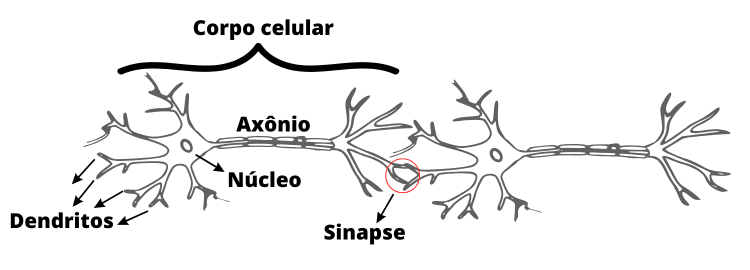

In [6]:
from IPython.display import Image, display
display(Image(filename='image/estrutura_neuronio.png', embed=True))

Podemos resumir o funcionamento dos neurônios como:
- O neurônio recebe sinais, também chamado de **impulsos**, por meio dos seus respectivos **dendritos**;
- Os impulsos são conduzidos para outros neurônios por meio de seus **axônios**;
- Os impulsos são então transmitidos por meio da conexão, chadamada de **sinapse**, entre as terminações do axônio e o dendrito de outro neurônio.

Considerando o resumo, podemos representar um neurônio artificial:

| Neurônio biológico | Neurônio artificial |
| :---- | :---- |
| Dendritos | Entrada |
| Sinapse | Pesos |
| Axônio | Saída |


Um dos primeiros e mais importantes estudos no tema foi ***The perceptron: A probabilistic model for information storage and organization in the brain*** conduzido por Rosenblatt (1958). A rede perceptron introdudiza por Rosenblatt foi criada para resolver problemas de classificação linearmente separáveis, utilizando a estrutura do neurônio anteriomente representado para o desenvolvimento do modelo (Figura 2).

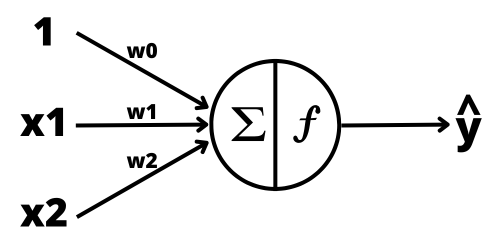

In [7]:
from IPython.display import Image, display
display(Image(filename='image/perceptron_model.png', embed=True))

Onde $x_1$, $x_2$ e $x_3$ são dados de entrada; $w_0$ é o víes (bias) da rede que serve para ajustar o valor da saída, $w_1$, $w_2$ e $w_3$ são os pesos associados às entradas, $f$ é a função de ativação (ex: função *step* ou *sign*), e $\hat{y}$ representa o dado de saída predito da rede.

Considerado um modelo preditivo baseado em otimização, o perceptron então é treinado corrigindo os erros da rede. Podemos então definir etapas para o processo de aprendizado da rede:
1. Definimos os dados supervisionados e os pesos que serão usados no treinamento;

| ID | \(x_1\) | \(x_2\) | Alvo (\(y\)) |
| --- | --- | --- | --- |
| A | 1 | 0 | 1 |
| B | 0 | 0 | 0 |
| C | 0 | 1 | 1 |
| D | 1 | 1 | 1 |

2. Escolhemos a função de ativação que será usada para definir o limiar (threshold) para o cálculo da saída:

$$
\text{step}(z) = 
\begin{cases} 
1, & \text{if } z \geq 0, \\
0, & \text{if } z < 0.
\end{cases}
$$

$$
\text{sign}(z) = 
\begin{cases} 
+1, & \text{if } z \geq 0, \\
-1, & \text{if } z < 0.
\end{cases}
$$

3. Calculamos o treinamento, aplicando a função de ativação na soma ponderada dos dados de entrada e seus respectivos pesos, onde o viés é representado por beta ($\beta_0$):

$$
\hat{y} = f\left(\beta_0 + \sum w_i x_i\right)
$$

4. Calculamos então o erro (loss) da rede e atualizamos os pesos caso necessário. Nessa etapa, o hiperparâmetro taxa de aprendizado (learning rate) $\alpha$ pode ser utilizado. O erro definido como **err** é a subtração da saída real ($y$) - a saída predita $\hat{y}$, ou seja: **err** = $y - \hat{y}$

A atualização dos pesos segue:

$$
w_j = w_j + \alpha \cdot x_j^i \cdot \text{err}
$$


## Vamos para a prática

Dado o conjunto de dados de treinamento $X$, sendo  $X = \Big\{(x_1,y_1), (x_2,y_2), \ldots, (x_N,y_N)\Big\}$, onde $x_i \in \mathbb{R}_d, $ e $ y_i \in \{-1, +1\}, i=1,2,\ldots,N$.

Dado $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}_d$, consideraremos a coordenada artifical $x_0$ = 1, então $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}_{1+d}$.

Assumindo um problema linearmente separável, ou seja, apenas uma reta (ou hiperplano) separa os exemplos em suas respectivas classes:

O algoritmo perceptron irá determina um vetor de pesos $\mathbf{w} \in \mathbb{R}_{1+d}$ tal que $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}_i) = y_i$, considerando a função de ativação sign (sinal), para todo

$$
sign(z) =
\begin{cases} 
    +1, & \text{if } z \geq 0, \\ 
    -1, & \text{if } z < 0. 
\end{cases}
$$




## Dados de treinamento

- Considerando $\mathbb{R}^2$ como sendo espaço real bidimensional que representa o plano cartesiano, onde cada ponto é descrito por dois números reais.
- Nosso conjunto de dados contém $N$ pontos, definidos entre $[-1,2]\times [-1,2] \subseteq \mathbb{R}^2$.
- Definimos os pontos $x = (x_1,x_2)$ como $f(x) \geq 0$ sendo os exemplos positivos, e $f(x) < 0$ como sendo os negativos (ou seja, as classes dos pontos são determinadas pelo sinal de $f$ nos respectivos pontos.
- Para ilustrar, traçaremos um gráfico com todos os exemplos, onde os <font color="blue">positivos</font> são representados em azul, e os negativos <font color="red">negativos</font> em vermelho, assim como a fronteira de decisão (decision boundary)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xmin = ymin = -1
xmax = ymax = 2

# Cria um array distribuido com N = 6 e d = 2.
#X = np.asarray([[1.5,-0],[0,0],[0,1],[1,0],[1,1],[1.5,1.5]]) 
X = np.random.uniform(xmin, xmax, size=(5, 2)) # Cria um array com dados aleatórios com N = 6 e d = 2.
print("Distribuição do array X: ", X.shape)

N = X.shape[0]
print("Número de exemplos (dados): ", N)

# Adiciona uma coluna a esquerda com 1s (coordenada artificial), considerando a quantidade de exemplos.
# Com isso, deixamos o X estendido com o mesmo numero de elementos do array de peso (començando do w_0).
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )
Xe = add_column_of_ones(X)
print("Distribuição do array X estendido (Xe): ", Xe.shape)

# Define o array de pesos alvo para o exemplo
w_target = np.asarray([[0.5],[-1], [1]])

print("Distribuição do array peso alvo (w_target): ", w_target.shape)
print("Array de pesos alvo: \n", w_target)

# Define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Distribuição do array de classes/rótulos (y): ", y.shape)

Distribuição do array X:  (5, 2)
Número de exemplos (dados):  5
Distribuição do array X estendido (Xe):  (5, 3)
Distribuição do array peso alvo (w_target):  (3, 1)
Array de pesos alvo: 
 [[ 0.5]
 [-1. ]
 [ 1. ]]
Distribuição do array de classes/rótulos (y):  (5, 1)


## Traçando o hiperplano


color:  ['red', 'red', 'blue', 'blue', 'blue']


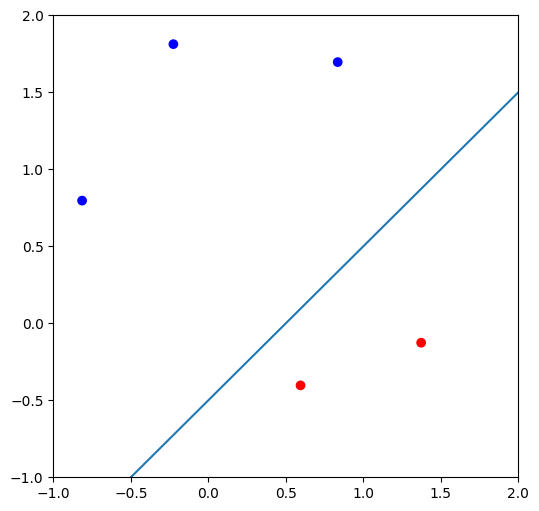

In [2]:
# Traça a linha
a = -w_target[1] / w_target[2] # inclinação
b = -w_target[0] / w_target[2] # interceptação
x_l = np.linspace(xmin, xmax, 50) # Usado para o desenho da reta - Retorna 50 números uniformemente espaçados em um intervalo especificado (xmin - xmax). 
y_l = a*x_l + b # função linear para se encontrar a reta.

plt.figure(figsize=(6,6))
plt.plot(x_l, y_l)
axes = plt.gca() # obtém os eixos atuais. Get the Current Axes (GCA)
axes.set_xlim([xmin,xmax]) # define os limites de visualização do eixo x.
axes.set_ylim([xmin,ymax]) # define os limites de visualização do eixo y.

# Determina as cores para cada exemplo
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print("color: ", colors) # mostra a distribuição das cores baseadas nos exemplos

# Traça os exemplos
plt.scatter(X[:,0],X[:,1],c=colors)

Vamos considerar um vetor de peso distante do peso alvo como hipótese inicial ($h_0$).

As cores vermelho ou azul serão usadas para indicar o rótulo alvo (ground-truth): <font color="blue">positivo</font> and <font color="red">negativo</font>

Para facilitar a classificação na hipótese atual, serão usados marcadores:
- o : classificado corretamente<br>
- x : classificado incorretamente<br>

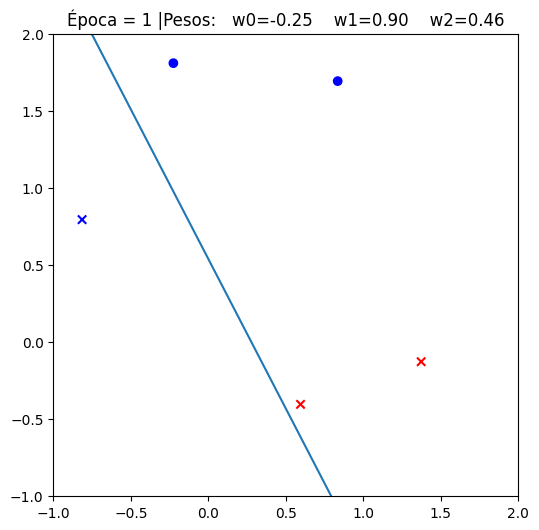

In [3]:
def plot_state(Xe, w, epoch=1, xmin=-1, xmax=2, ymin=-1, ymax=2):
    # calcular a previsão (yhat)
    yhat = np.sign(np.dot(Xe,w)) # usando a função de ativação sinal (sign), calcule o produto interno (np.dot) dos arrays Xe e w.
    correct = np.where(y == yhat)[0]
    misclassified = np.where(y != yhat)[0]

    # traçando o hiperplano
    a = -w[1] / w[2] # inclinação
    b = -w[0] / w[2] # interceptação
    x_l = np.linspace(xmin, xmax, 50)
    y_l = a*x_l + b

    plt.figure(figsize=(6,6))
    plt.plot(x_l, y_l)
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([xmin,ymax])
    

    # Plotando os pontos corretamente classificados
    plt.scatter(Xe[correct, 1], Xe[correct, 2],
                c=["blue" if y[i] == 1 else "red" for i in correct],
                marker='o')

    # Plotando os pontos incorretamente classificados
    plt.scatter(Xe[misclassified, 1], Xe[misclassified, 2],
                c=["blue" if y[i] == 1 else "red" for i in misclassified],
                marker='x')
    plt.title("Época = %.0f |Pesos:   w0=%.2f    w1=%.2f    w2=%.2f" %(epoch,w[0],w[1],w[2]))

    plt.show()

# Modifique a seed do array para verificar os diferentes comportamentos considerando a mudança no array de peso
np.random.seed(42)
w0 = np.random.uniform(-1, 1, size=(3, 1))
   
plot_state(Xe,w0)

## Com tudo pronto, desenvolvemos um método.

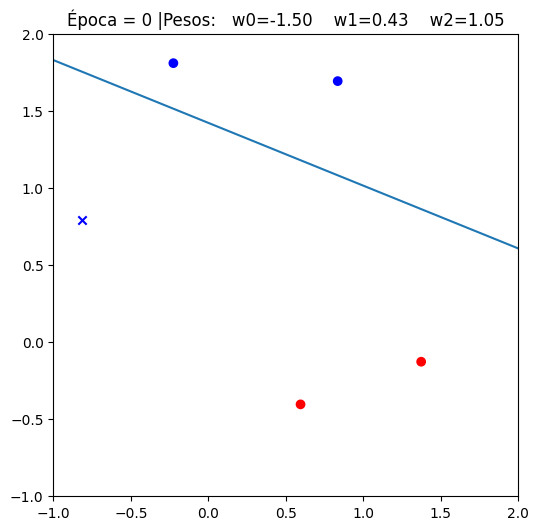

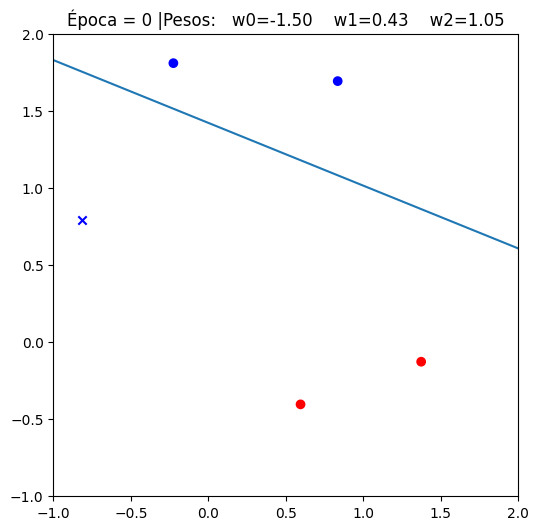

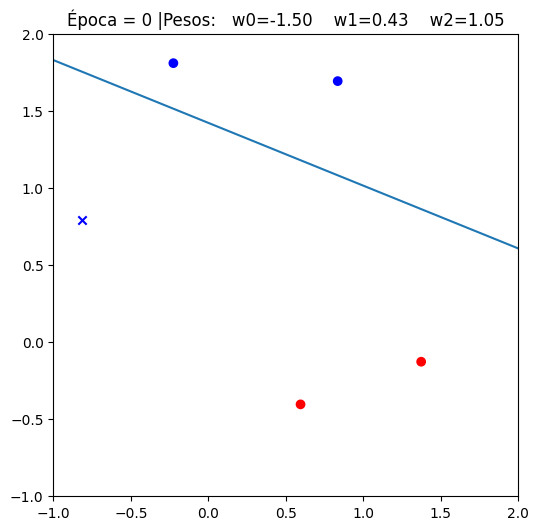

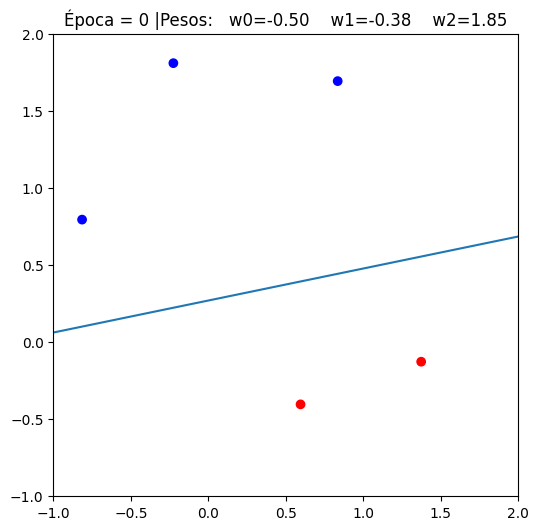

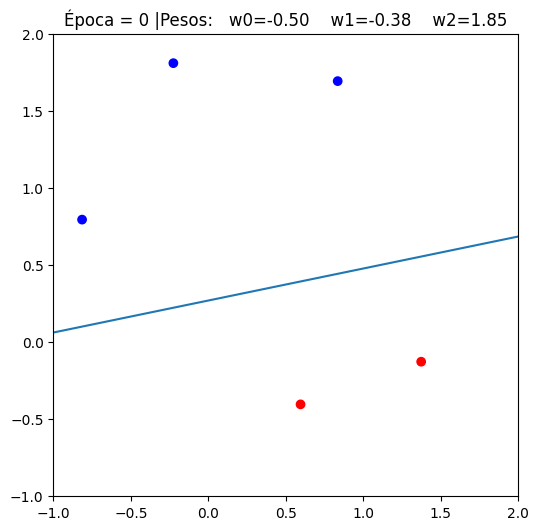

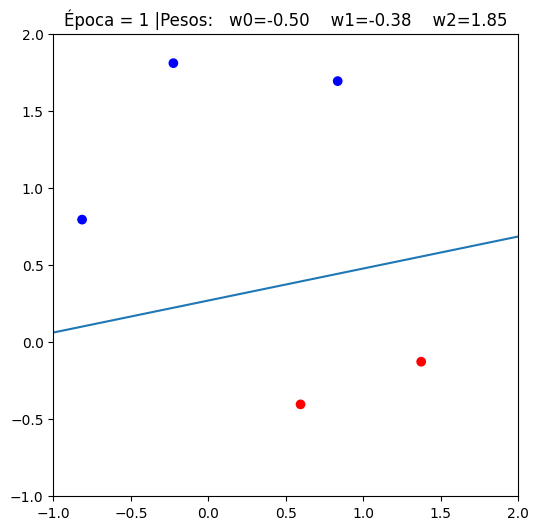

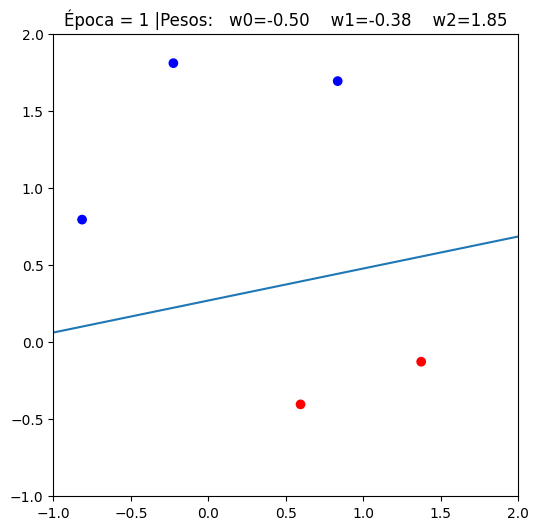

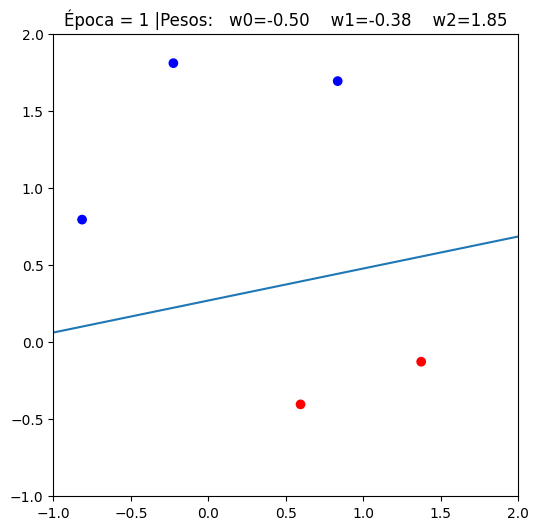

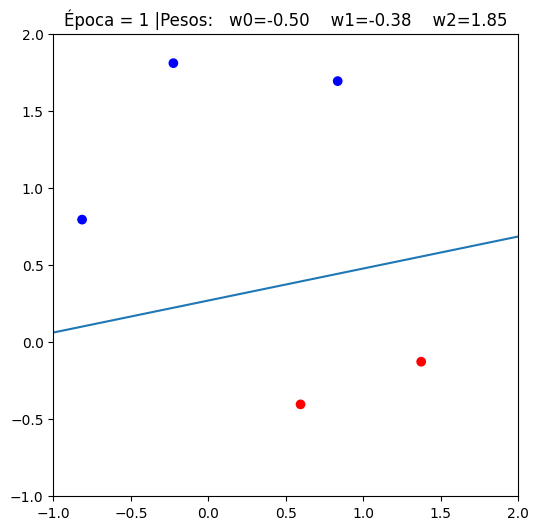

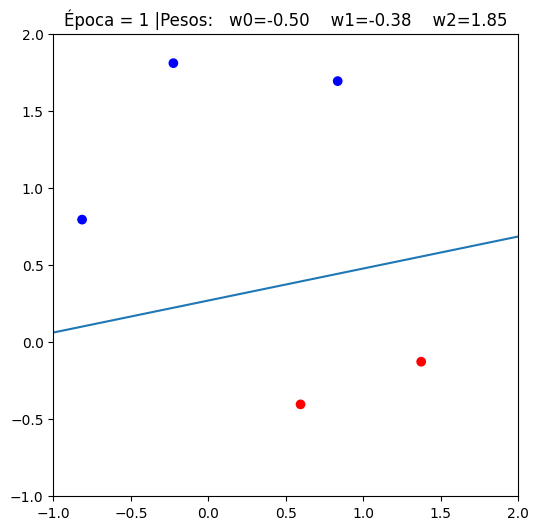


Vetor final de pesos =
 [[-0.50183952]
 [-0.38475184]
 [ 1.85064251]]


In [4]:
def perceptron(Xe, y,max_iter=10,plot=False):
    """
    Parameters:
       Xe   : ndarray (N,d+1) - it already has the 1's in column 0
       y    : ndarray (N,1)
       max_iter: maximun number of epochs to converge
       plot : If True, plot the state at the beginning of each iteration
       
    Returns:
       w : ndarray (d+1,1) - the final weight vector
    """
    np.random.seed(42)
    w0 = np.random.uniform(-2, 2, (3,1)) #vetor de pesos inicial
    

    for epoch in range(max_iter):
        converged = True
        for i, xi in enumerate(Xe):
            yhat = np.sign(np.dot(w0.T, xi))
            if yhat != y[i]:
                w0 += y[i] * xi.reshape(-1, 1) # Não é necessário calcular o erro (err) como mostrado na teoria, tendo em vista que yhat != y já indica erro, e a atualização é proporcional a y * x
                converged = False
            if plot:
                plot_state(Xe, w0, epoch=epoch)
        if converged:  # Se não houver mudanças em uma época, o modelo convergiu
            break
    return print("\nVetor final de pesos =\n", w0)
    
perceptron(Xe,y,plot=True)